In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
fic_epita_kantar_codes = pd.read_csv('fic_epita_kantar_codes.csv', sep=';')
fic_epita_kantar_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,...,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,...,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1,0,0,2,NaN,2.0,...,1,2,1,2,2.0,6,3,75,0,2
4998,4999,MET20_1235808,2.022023,0,0,1,0,3,NaN,1.0,...,2,3,2,1,NaN,2,3,33,1,3


In [3]:
a9_cols = [col for col in fic_epita_kantar_codes.columns if col.startswith('A9_')]
a10_cols = [col for col in fic_epita_kantar_codes.columns if col.startswith('A10_')]
a11_cols = [col for col in fic_epita_kantar_codes.columns if col.startswith('A11_')]

# Calculer la moyenne pour chaque ensemble de colonnes (ou autre méthode de réduction si nécessaire)
fic_epita_kantar_codes['A9'] = fic_epita_kantar_codes[a9_cols].mean(axis=1)
fic_epita_kantar_codes['A10'] = fic_epita_kantar_codes[a10_cols].mean(axis=1)
fic_epita_kantar_codes['A11'] = fic_epita_kantar_codes[a11_cols].mean(axis=1)

# Standardiser les données pour le clustering
scaler = StandardScaler()
features = scaler.fit_transform(fic_epita_kantar_codes[['A9', 'A10', 'A11']])

# Appliquer KMeans pour le clustering (choisir le nombre de clusters souhaité, ici 3)
kmeans = KMeans(n_clusters=3, random_state=42)
fic_epita_kantar_codes['Cluster'] = kmeans.fit_predict(features)

# Afficher les résultats
fic_epita_kantar_codes[['Respondent_ID', 'A9', 'A10', 'A11', 'Cluster']]

,Respondent_ID,A9,A10,A11,Cluster
0,MET20_999999996,2.0000,2.000,2.000000,2
1,MET20_98888888,1.0000,1.000,2.000000,0
2,MET20_1978307,2.2500,2.250,2.000000,2
3,MET20_1302078,2.0625,2.375,2.000000,2
4,MET20_1869308,2.0000,2.000,2.000000,2
...,...,...,...,...,...
4995,MET20_779605,2.3125,1.750,1.153846,0
4996,MET20_80000348,2.5625,2.250,2.384615,2
4997,MET20_288029,3.1875,2.000,2.692308,1
4998,MET20_1235808,3.0000,2.250,2.307692,2


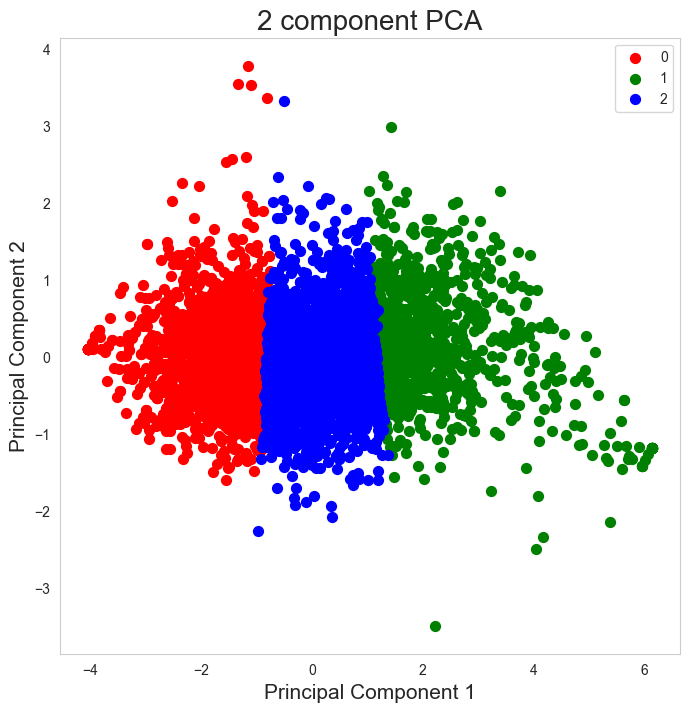

In [4]:
# Visualisation des clusters
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, fic_epita_kantar_codes[['Cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], finalDf.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
    
ax.legend(targets)
ax.grid()